In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('Data/all_data.csv')
df = pd.DataFrame(data)
df.head()

,YEAR,DOY,HR,Kp index,R-(Sunspot No.),Dst-index-nT,ap_index-nT,f10.7_index
0,2014,1,0,23,124,-11,11,154.3
1,2014,2,0,33,133,-19,18,155.2
2,2014,3,0,20,153,-18,9,176.3
3,2014,4,0,17,136,-10,6,253.3
4,2014,5,0,7,134,-8,3,210.3


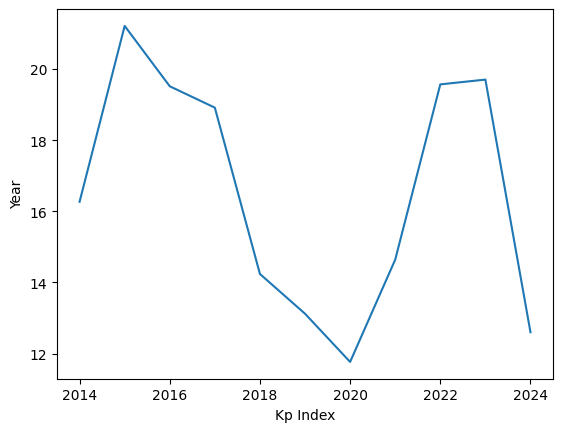

In [5]:
kp_index_yearly = df.groupby(df['YEAR'])['Kp index'].mean()
plt.plot(kp_index_yearly.index, kp_index_yearly.values)
plt.xlabel('Kp Index')
plt.ylabel('Year')
plt.show()

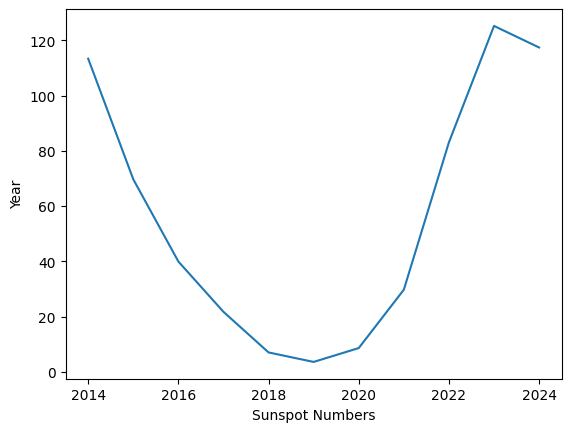

In [6]:
r_yearly = df.groupby(df['YEAR'])['R-(Sunspot No.)'].mean()
plt.plot(r_yearly.index, r_yearly.values)
plt.xlabel('Sunspot Numbers')
plt.ylabel('Year')
plt.show()

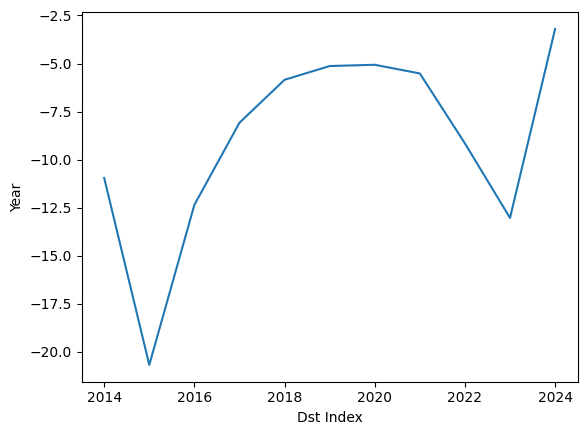

In [7]:
dst_index_yearly = df.groupby(df['YEAR'])['Dst-index-nT'].mean()
plt.plot(dst_index_yearly.index, dst_index_yearly.values)
plt.xlabel('Dst Index')
plt.ylabel('Year')
plt.show()

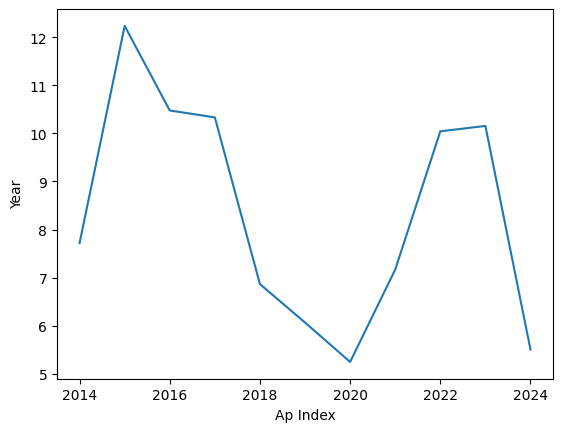

In [8]:
ap_index_yearly = df.groupby(df['YEAR'])['ap_index-nT'].mean()
plt.plot(ap_index_yearly.index, ap_index_yearly.values)
plt.xlabel('Ap Index')
plt.ylabel('Year')
plt.show()

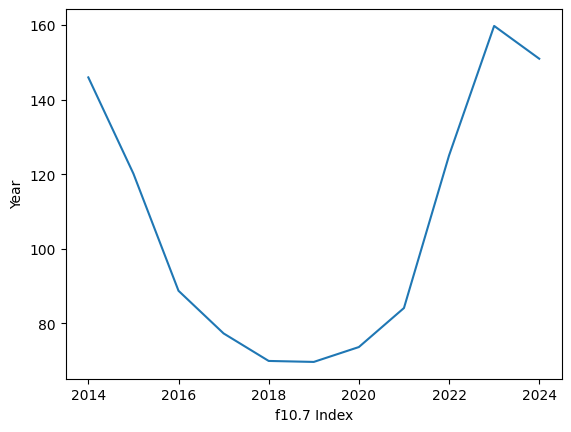

In [9]:
f107_index_yearly = df.groupby(df['YEAR'])['f10.7_index'].mean()
plt.plot(f107_index_yearly.index, f107_index_yearly.values)
plt.xlabel('f10.7 Index')
plt.ylabel('Year')
plt.show()

In [10]:
tec1 = np.load('Data/codg2014.npy')
tec2 = np.load('Data/codg2015.npy')
tec3 = np.load('Data/codg2019.npy')
tec4 = np.load('Data/codg2020.npy')
print(tec1)


[[[[ 8.3]
   [ 8.4]
   [ 8.4]
   ...
   [ 8.3]
   [ 8.3]
   [ 8.3]]

  [[ 8.1]
   [ 8.2]
   [ 8.3]
   ...
   [ 7.9]
   [ 8. ]
   [ 8.1]]

  [[ 7.9]
   [ 8. ]
   [ 8.2]
   ...
   [ 7.5]
   [ 7.7]
   [ 7.9]]

  ...

  [[23.4]
   [23.6]
   [23.8]
   ...
   [22.6]
   [23. ]
   [23.4]]

  [[21.2]
   [21.3]
   [21.4]
   ...
   [20.8]
   [21. ]
   [21.2]]

  [[19.5]
   [19.6]
   [19.6]
   ...
   [19.3]
   [19.4]
   [19.5]]]


 [[[ 6.7]
   [ 6.7]
   [ 6.8]
   ...
   [ 6.6]
   [ 6.6]
   [ 6.7]]

  [[ 5.8]
   [ 5.9]
   [ 6. ]
   ...
   [ 5.7]
   [ 5.7]
   [ 5.8]]

  [[ 4.8]
   [ 4.9]
   [ 5. ]
   ...
   [ 4.6]
   [ 4.7]
   [ 4.8]]

  ...

  [[25.9]
   [25.8]
   [25.7]
   ...
   [25.8]
   [25.9]
   [25.9]]

  [[22.8]
   [22.8]
   [22.8]
   ...
   [22.7]
   [22.8]
   [22.8]]

  [[20.5]
   [20.6]
   [20.6]
   ...
   [20.4]
   [20.5]
   [20.5]]]


 [[[ 7.2]
   [ 7.3]
   [ 7.3]
   ...
   [ 7. ]
   [ 7.1]
   [ 7.2]]

  [[ 6.6]
   [ 6.8]
   [ 7. ]
   ...
   [ 6.3]
   [ 6.4]
   [ 6.6]]

  [[ 5.9]
   [ 6

In [11]:
print(tec1.shape)
print(tec2.shape)
print(tec3.shape)
print(tec4.shape)

(4380, 71, 73, 1)
(8760, 71, 73, 1)
(8760, 71, 73, 1)
(8784, 71, 73, 1)


Time Dimension:

4380, 8760, 8760, 8784: These numbers likely represent the total number of time steps recorded in each array. Given that the numbers are close to the number of hours in a year (8760 hours in a non-leap year and 8784 hours in a leap year), it's plausible that these arrays represent hourly TEC data for different years.
4380: This is half of 8760, which could indicate data for half a year or data collected at a lower temporal resolution, such as every two hours over a full year.

Spatial Dimensions:

71, 73: These numbers likely represent spatial grid points, such as latitude and longitude points or a grid over a specific region. There are 71 points along one spatial dimension and 73 points along another.
1: This final dimension likely indicates that each grid point at each time step contains a single TEC value. This dimension may be a placeholder to allow for easier manipulation of the array if additional channels or features were to be added.

In [12]:
def convert_to_dataframe(tec_array, year):
    # Get the dimensions of the array
    time_dim, lat_dim, lon_dim, _ = tec_array.shape
    
    # Create a MultiIndex for the DataFrame
    index = pd.MultiIndex.from_product([range(time_dim), range(lat_dim), range(lon_dim)], names=['Time', 'Latitude', 'Longitude'])
    
    # Flatten the array and create the DataFrame
    flattened_array = tec_array.reshape(-1, tec_array.shape[-1])
    df = pd.DataFrame(flattened_array, columns=['TEC'], index=index).reset_index()
    
    # Add the year column
    df['Year'] = year
    
    return df

# Convert each array to a DataFrame
df_tec1 = convert_to_dataframe(tec1, 2014)
df_tec2 = convert_to_dataframe(tec2, 2015)
df_tec3 = convert_to_dataframe(tec3, 2019)
df_tec4 = convert_to_dataframe(tec4, 2020)

# Concatenate all DataFrames into a single DataFrame
df_tec = pd.concat([df_tec1, df_tec2, df_tec3, df_tec4], ignore_index=True)

# Display the DataFrame
print(df_tec.head())
print(df_tec.info())

   Time  Latitude  Longitude  TEC  Year
0     0         0          0  8.3  2014
1     0         0          1  8.4  2014
2     0         0          2  8.4  2014
3     0         0          3  8.4  2014
4     0         0          4  8.5  2014
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159035172 entries, 0 to 159035171
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Time       int64  
 1   Latitude   int64  
 2   Longitude  int64  
 3   TEC        float64
 4   Year       int64  
dtypes: float64(1), int64(4)
memory usage: 5.9 GB
None


In [14]:
df_tec.tail()

,Time,Latitude,Longitude,TEC,Year
159035167,8783,70,68,9.2,2020
159035168,8783,70,69,9.3,2020
159035169,8783,70,70,9.4,2020
159035170,8783,70,71,9.5,2020
159035171,8783,70,72,9.6,2020


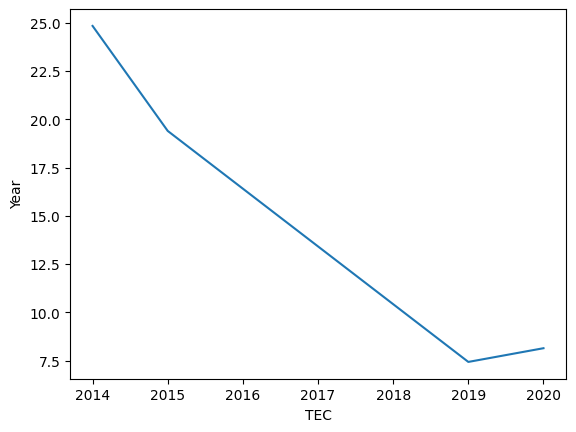

In [15]:
tec_yearly = df_tec.groupby('Year')['TEC'].mean()
plt.plot(tec_yearly.index, tec_yearly.values)
plt.xlabel('TEC')
plt.ylabel('Year')
plt.show()